# Homework 2: Programming

The following notebook contains skeleton-code for answering problems 2 and 3 of homework assignment 2. Please read through each cell carefully to understand what is expected to be implemented. For your final submission, please try to clean up any intermediate outputs used for debugging.

### Imports

You should be able to complete the entire assignment using only the following imports. Please consult the course staff if you are unsure about whether additional packages may be used.

In [1]:
## Import Packages
import random
import numpy as np
import matplotlib.pyplot as plt

## Question 2


Below we provide an AutoGrad class named `Value`. The basic idea is to store the existing computational map during the creation of each `Value`, and calculate the gradient using backpropagation when one of the `Value` calls `backward()` method.

The `backward()` function will arange the computational graph and backpropagate the gradients. All you need to do is to implement all the operations with its corresponding `_backward` function. We have provided the `__add__` function (sum of two nodes) as an example to help get you started.

This notebook is designed in a Object Oriented way, if you are not farmiliar with the Object Oriented Programming in Python, you can refer to:

(1) https://realpython.com/python3-object-oriented-programming/

(2) https://docs.python.org/3/tutorial/classes.html


In [2]:
class Value:
    
    """
    Basic unit of storing a single scalar value and its gradient
    """
    
    def __init__(self, data, _children=()):
        """
        
        """
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._backward = lambda: None
    
    def __add__(self, other):
        """
        Example implementation of a single class operation (addition)
        
        Args:
            other (Any): Node to add with the class
        
        Returns:
            out (callable): Function to referesh the gradient
        """
        #Firstly, convert some default value type in python to Value
        #Then do operations with two or more Value object
        other = other if isinstance(other, Value) else Value(other)

        #Secondly, create a new Value object which is the result of the operation 
        out = Value(self.data + other.data, (self, other))

        #Thirdly, create a _backward function for the output object to refresh
        # the gradient of its _childrens, 
        #Then assign this _backward function to the output object.
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        """
        Multiplication operation (e.g. Value(3) * Value(2) = Value(6))
        """
        #TODO implement multiplication operation

        other = other if isinstance(other, Value) else Value(other)     #make sure other is in the Value class
        out = Value(self.data * other.data, (self, other))    #define the forward result of a mult. operation and save self & other as children of new Value

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        
        out._backward = _backward

        return out
    
    def __pow__(self, other):
        """
        Power operation (e.g Value(3) ** 2 = Value(9))
        """
        #TODO implement power operation, we don't need to convert the exponent to Value
        
        #We do not convert other to Value in this case because other is not meaningful in a sense that we do not need a node that contains it nor any value or gradient for it.
        assert isinstance(other, (int, float))

        out = Value(self.data ** other, (self, ))

        def _backward():
            self.grad += out.grad * other * (self.data ** (other - 1))
        
        out._backward = _backward
       
        return out
    
    def relu(self):
        """
        ReLU activation function applied to the current Value
        """
        #TODO implement the relu activation function for the value itself.
        if self.data < 0:
            out = Value(0, (self, ))
        else:
            out = Value(self.data, (self, ))

        def _backward():
            self.grad += out.grad * out.data

        out._backward = _backward

        return out
    
    
    def exp(self):
        """
        Exponentiate the current Value (e.g. e ^ Value(0) = Value(1))
        """
        #TODO implement the exponential function for and treat the value as exponent.
        #The base is natural e, you can use numpy to calculate the value of the exponential.
        out = Value(np.exp(self.data), (self, ))

        def _backward():
            self.grad += out.grad * out.data

        out._backward = _backward

        return out
    
    def log(self):
        """
        Take the natural logarithm (base e) of the current Value
        """
        #TODO implement the logarithm function for and treat the value as exponent.
        #The bottom number should be e, you can use numpy to calculate the value of the logarithm.
        out = Value(np.log(self.data), (self, ))

        def _backward():
            self.grad += out.grad / self.data

        out._backward = _backward

        return out

    def backward(self):
        """
        Run backpropagation from the current Value
        """
        #This function is called when you start backpropagation from this Value

        #The gradient of this value is initialized to 1 for you.
        self.grad = 1

        #You need to find a right topological order all of the children in the graph.
        #As for topology sort, you can refer to http://www.cs.cornell.edu/courses/cs312/2004fa/lectures/lecture15.htm
  
        topo = []
        #TODO find the right list of Value to be traversed
        '''
        Hint: you can recursively visit all non-visited node from the node calling backward.
        add one node to the head of the list after all of its children node are visited
        '''
        #Initialize an empty set for nodes, so that we can add a node in once it has been visited to avoid making duplicate nodes.
        node = set()

        #Use Depth-First-Search method defined below to add nodes, travers all nodes from top to bottom, then add nodes into topo in topological order.
        self.DFS(node, topo)
        #Reverse the topo list so we can perform backpropagation starting from the last node
        topo.reverse()
        
        #go one variable at a time and apply the chain rule to get its gradient

        for v in topo:
            v._backward()

    # Define DFS
    def DFS(self, node, topo):
        if self not in node:
            node.add(self)
            for x in self._prev:      #for each child node of self, recursively run them through the DFS function
                x.DFS(node, topo)
            topo.append(self)

    # We handled the negation and reverse operations for you
    def __neg__(self): # -self
        """
        Negate the current Value
        """
        return self * -1

    def __radd__(self, other): #other + self
        """
        Reverse addition operation (ordering matters in Python)
        """
        return self + other
    
    def __sub__(self, other): # self - other
        """
        Subtraction operation
        """
        return self + (-other)
    
    def __rsub__(self, other): # other - self
        """
        Reverse subtraction operation
        """
        return other + (-self)
    
    def __rmul__(self, other): # other * self
        """
        Reverse multiplication operation
        """
        return self * other
    
    def __truediv__(self, other): # self / other
        """
        Division operation
        """
        return self * other**-1
    
    def __rtruediv__(self, other): # other / self
        """
        Reverse diction operation
        """
        return other * self**-1
    
    def __repr__(self):
        """
        Class representation (instead of unfriendly memory address)
        """
        return f"Value(data={self.data}, grad={self.grad})"

Now, we are going to use the simple example in q1.b to get you familar with the usage of this class.

If your implementation is correct, you will get the same values and gradients as your hand-caculated ones.

Be careful! Even you get this test case right, it does not guarantee the correctness of your implementation. 

In [3]:
## Initialize Example Values (From Written Assignment)
w1 = Value(0.3)
w2 = Value(-0.5)
x1 = Value(0.2)
x2 = Value(0.4)

#TODO
#Do calculation for the question 1.b, and call backward to start backpropagation.
q1 = w1.__mul__(x1)       #w1 * x1
q2 = x2.__mul__(w2)       #x2 * w2
q3 = q1.__add__(q2)       #w1 * x1 + x2 * w2
q4 = q3.__neg__()         #(w1x1 + w2x2)(-1)
q5 = q4.exp()             #exp(-(w1x1 + w2x2))
q6 = q5.__radd__(1)       #1 + exp(-(w1x1 + w2x2))
q7 = q6.__rtruediv__(1)   #1 / (1 + exp(-(w1x1 + w2x2)))

r1 = w1.__pow__(2)        #w1^2
r2 = w2.__pow__(2)        #w2^2
r3 = r1.__add__(r2)       #w1^2 + w2^w
r4 = r3.__rmul__(0.5)     #(w1^2 + w2^w)(0.5)

f = q7.__add__(r4)        #1 / (1 + exp(-(w1x1 + w2x2))) + 0.5(w1^2 + w2^2)
f.backward()

#Then print out the gradient of w1 w2 x1 x2.
print('Gradients of f with respect to:')
print('w1 = ', w1.grad, 'w2 = ', w2.grad, 'x1 = ', x1.grad, 'x2 = ', x2.grad)

#Print the intermediate values
inter = [q1, q2, q3, q4, q5, q6, q7, r1, r2, r3, r4, f]
function_name = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 
                 'q7', 'r1', 'r2', 'r3', 'r4', 'f']
print(' ', 'Forward', 'Backward')
for i in range(len(inter)):
    print(function_name[i], '%.3f' % inter[i].data, '%.3f' % inter[i].grad)



Gradients of f with respect to:
w1 =  0.34975579811673396 w2 =  -0.400488403766532 x1 =  0.074633697175101 x2 =  -0.124389495291835
  Forward Backward
q1 0.060 0.249
q2 -0.200 0.249
q3 -0.140 0.249
q4 0.140 -0.249
q5 1.150 -0.216
q6 2.150 -0.216
q7 0.465 1.000
r1 0.090 0.500
r2 0.250 0.500
r3 0.340 0.500
r4 0.170 1.000
f 0.635 1.000


## Question 3

### Implementation of the linear layer
You will implement a `LinearLayer` module here.

We provide the initialization of the class `LinearLayer`. You need to implement the forward function -- Return the results - `out` with the shape `[n_samples, n_out_channels]` of a linear layer when the the data `x` shaped `[n_samples, n_in_channels]` is fed into it.
 

In [4]:
class Module:
    
    """
    Base Model Module
    """
    
    def parameters(self):
        """
        
        """
        return []

    def zero_grad(self):
        """
        
        """
        for p in self.parameters():
            p.grad = 0

class LinearLayer(Module):
    
    """
    Linear Layer
    """
    
    def __init__(self, nin, nout):
        """
        Here we randomly initilize the weights w as 2-dimensional list of Values
        And b as 1-dimensional list of Values with value 0
        
        You may use this stucture to implement the __call__ function
        """
        self.w = []
        for i in range(nin):
            w_tmp = [Value(random.uniform(-1,1)) for j in range(nout)]
            self.w.append(w_tmp)
        self.b = [Value(0) for i in range(nout)]
        self.nin = nin
        self.nout = nout
  
    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]
        
        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout] 
        """
        #TODO implement this function and return the output of a linear layer.
        #f(x,W,b) = Wx+b

        xout = []
        for i in range(len(x)):
            x_temp = []
            for k in range(self.nout):
                temp_value = Value(0)
                temp_value = sum([self.w[j][k] * x[i][j] for j in range(self.nin)]) + self.b[k]
                x_temp.append(temp_value)
            xout.append(x_temp)
        
        return xout

    def parameters(self):
        """
        Get the list of parameters in the Linear Layer
        
        Args:
            None
        
        Returns:
            params (list): List of parameters in the layer
        """
        return [p for row in self.w for p in row] + [p for p in self.b]

Test your implementation of linear layer, the error should be nearly 0.

In [5]:
## Initialization of Layer with Weights
linear_model_test = LinearLayer(4, 4)
linear_model_test.w = [[Value(data=0.7433570245252463), Value(data=-0.9662164096144394), Value(data=-0.17087204941322653), Value(data=-0.5186656374983067)], 
                       [Value(data=-0.1414882837892344), Value(data=-0.5898971049017006), Value(data=-0.3448340220492381), Value(data=0.5278833226346107)], 
                       [Value(data=0.3990701306597799), Value(data=-0.3319058654296163), Value(data=-0.784797384411202), Value(data=0.7603317495966846)], 
                       [Value(data=-0.5711035064293541), Value(data=-0.0001937643033362857), Value(data=0.12693226232877053), Value(data=-0.36044237239197097)]]
linear_model_test.b = [Value(data=0), Value(data=0), Value(data=0), Value(data=0)]

## Forward Pass
x_test = [[-0.17120438454836173, -0.3736077734087335, -0.48495413054653214, 0.8269206715993096]]
y_hat_test = linear_model_test(x_test)
y_ref = [[Value(data=-0.7401928625441141), Value(data=0.5466095223360173), Value(data=0.6436403600545564), Value(data=-0.7752067527386406)]]

## Error Calculation
predict_error = 0
for i in range(4):
    predict_error += (y_hat_test[0][i] - y_ref[0][i])**2
print(predict_error.data)

0.0


### Implementation of Loss functions

You will implement softmax, cross entropy loss, and accuracy here for further use

In [6]:
def softmax(y_hat):
    """
    Softmax computation
    
    Args:
        y_hat (2d-list): 2-dimensional list of Values with shape [batch_size, n_class]
    
    Returns:
        s (2d-list): 2-dimensional list of Values with the same shape as y_hat    
    """
    #TODO implement the softmax function and return the output.
    s = []
    for i in range(len(y_hat)):
        temp = []     #for every sample we need a new temp list to hold the expected value of true class
        sum_pred = Value(0)     
        for j in range(len(y_hat[0])):
            sum_pred += np.exp(y_hat[i][j])
        temp = list(np.exp(y_hat[i][j])/sum_pred for j in range(len(y_hat[0])))
        s.append(temp)

    return s

In [7]:
def cross_entropy_loss(y_hat, y):
    """
    Cross-entropy Loss computation
    
    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]
    
    Returns:
        loss (Value): Loss value of type Value
    """
    #TODO implement the calculation of cross_entropy_loss between y_hat and y.
    soft = softmax(y_hat)
    loss = Value(0)
    for i in range(len(y)):
        for j in range(len(y_hat[0])):
            if y[i] == j:
                loss -= np.log(soft[i][j])
    loss = loss/len(y)
    
    return loss

In [8]:
def accuracy(y_hat, y):
    """
    Accuracy computation
    
    Args:
        y_hat (2d-list): Output from linear function with shape [batch_size, n_class]
        y (1d-list): List of ground truth labels with shape [batch_size, ]
    
    Returns:
        acc (float): Accuracy score
    """
    #TODO implement the calculation of accuracy of the predicted y_hat w.r.t y.
    cnt = 0
    for i in range(len(y)):
        if all(y_hat[i][y[i]].data >= y_hat[i][j].data for j in range(len(y_hat[0]))):
            cnt += 1
    acc = cnt/len(y)
    
    return acc

Test the implementation of `softmax()` and `cross_entropy_loss()` as well as the gradient calculation of `Value` class. The errors should be nearly 0.

In [9]:
## Ground Truth + Forward Pass
y_gt = [1]
y_hat_test = linear_model_test(x_test)

## Softmax Calculation
prob_test = softmax(y_hat_test)
prob_ref = [[0.10441739448437284, 0.37811510516540814, 0.4166428991676558, 0.10082460118256342]]
softmax_error = 0
for i in range(4):
    softmax_error += (prob_ref[0][i] - prob_test[0][i])**2
print(softmax_error.data)

## Cross Entropy Loss Calculation
loss_test = cross_entropy_loss(y_hat_test, y_gt)
loss_ref = Value(data=0.9725566186970217)
print((loss_test - loss_ref).data)

## Update Gradient Based on Loss
linear_model_test.zero_grad()
loss_test.backward()
w_gradient_ref = [[-0.017876715758840547, 0.10646942068007896, -0.07133109112844363, -0.01726161379279479], 
                  [-0.0390111502584479, 0.23234103087567629, -0.1556610258645873, -0.03766885475264107], 
                  [-0.05063764675610328, 0.30158564847453107, -0.2020526949142369, -0.04889530680419089], 
                  [0.08634490197366762, -0.5142494748940867, 0.3445306259968013, 0.08337394692361787]]
b_gradient_ref = [0.10441739448437282, -0.6218848948345919, 0.4166428991676557, 0.1008246011825634]

## Compute Error
w_gradient_error = 0
b_gradient_error = 0
for i in range(4):
    b_gradient_error += (linear_model_test.b[i].grad - b_gradient_ref[i]) ** 2
    for j in range(4):
        w_gradient_error += (linear_model_test.w[i][j].grad - w_gradient_ref[i][j]) ** 2
print(w_gradient_error)
print(b_gradient_error)

0.0
0.0
6.355568816477878e-33
1.232595164407831e-32


Implement the following functions to visualize the ground truth and the decision boundary in the same figure.

In [10]:
def plot_points(X, Y, scale, n, data):
    """
    Plot points in the visualization image
    """
    points_color = [[0., 0. , 255.], [255., 0., 0.], [0., 255., 0.],[0., 0. , 0.]]
    
    for i in range(X.shape[0]):
        #TODO Assign a color to "data" according to the position and the label of X
        #rescale the values of X
        x1 = (X[i][0] + scale) / (scale * 2 / n)  #-scale to +scale: scale*2， then divide by the number of pixels
        x2 = (X[i][1] + scale) / (scale * 2 / n)
        for j in range(3):
            data[int(x1)][int(x2)][j] = points_color[int(Y[i])][j] #assign color
    
    return data

def plot_background(scale, n, model):
    """
    Color the background in the visualization image
    """

    background_color = [[0., 191., 255.], [255., 110., 180.], [202., 255., 112.],[156., 156., 156.]]
   
    data = np.zeros((n,n,3), dtype='uint8')     #n number of n*3 2-d array
    
    for i in range(n):
        x1 = -scale + 2 * scale / n * i
        for j in range(n):
            x2 = -scale + 2 * scale / n * j
            input = [[Value(x1),Value(x2)]]
            
            #TODO using the model to predict a class for the input and assign a color to "data" at this position.
            out = model(input)[0]
            temp = out[0].data
            label = 0
            for k in range(1,len(out)):
                if out[k].data > temp:
                    temp = out[k].data      #update the value of temp when we found a higher score
                    label = k
            
            for z in range(3):
                data[i][j][z] = background_color[label][z]
    return data


def visualization(X, Y, model):
    """
    Decision boundary visualization
    """
    scale = 4.5  # the scale of X axis and Y axis. To say, x is from -scale to +scale
    n = 300      # seperate the image into n*n pixels 

    data = plot_background (scale, n, model)
    data = plot_points (X, Y, scale, n, data)
    
    plt.imshow(data)
    plt.axis('off')
    plt.show()

if you implement the plot function correctly, you will get some image like:

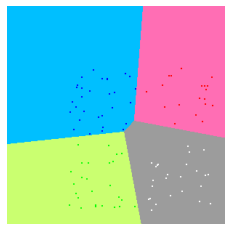


### Implementation of training procedure

With input data `x`, ground_truth `y`, and `model` as parameters, implement the gradient descent method to train your model and plot loss and accuracy vs training iterations

In [11]:
def train(x,
          y,
          model,
          loss_function=cross_entropy_loss, 
          accuracy_function=accuracy,
          max_iteration=500,
          learning_rate=1):
    """
    Args:
       x (2-d list): List of Values with shape: [n_samples, n_channels]
       y (1-d list): List of integers with shape: [n_samples]
       model (Module): Linear model
       loss_function (callable): Loss function to use during training
       accuracy_function (callable): Function used for calculating training accuracy
       max_iteration (int): Number of epochs to train model for
       learning_rate (numeric): Step size of the gradient update
    """
    for i in range(max_iteration):
        #TODO compute y_hat and calculate the loss between y_hat and y as well as
        # the accuracy of y_hat w.r.t y.
        y_hat = model(x)
        loss = loss_function(y_hat, y)
        acc = accuracy_function(y_hat, y)

        #TODO Then You will need to calculate gradient for all parameters, and 
        #do gradient descent for all the parameters.
        #The list of parameters can be easily obtained by calling 
        #model.parameters() which is implemented above.
        
        # model.zero_grad()
        loss.backward()

        params = model.parameters()
        for p in params:
            p.data -= learning_rate * p.grad      #gradient descent
            p.grad = 0                            #zero out the gradient

        #Then plot the loss / accuracy vs iterations.
        if i % 20 == 19:
            print("iteration",i,"loss:",loss.data, "accuracy:",acc)
        ## record loss
        if i == 0 :
        # initialize L
            L = loss.data
            A = acc
        else:
            L = np.append(L,loss.data)
            A = np.append(A,acc)
    
    ## Plot Loss and Accuracy
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.show()


### Train the model

Load the data, format it, instantiate your model and start training!

(100, 2) (100,) [0 1 2 3]
iteration 19 loss: 0.552888871067722 accuracy: 0.96
iteration 39 loss: 0.41229592749091715 accuracy: 0.97
iteration 59 loss: 0.3444207301057917 accuracy: 0.98
iteration 79 loss: 0.3021853961224571 accuracy: 0.98
iteration 99 loss: 0.27256724293561657 accuracy: 0.98
iteration 119 loss: 0.2502722338187816 accuracy: 0.99
iteration 139 loss: 0.23267825430229053 accuracy: 0.99
iteration 159 loss: 0.21831616895075917 accuracy: 0.99
iteration 179 loss: 0.20628968377154638 accuracy: 0.99
iteration 199 loss: 0.19601661892097755 accuracy: 0.99
iteration 219 loss: 0.18710014158204186 accuracy: 0.99
iteration 239 loss: 0.17925918260721868 accuracy: 0.99
iteration 259 loss: 0.17228833981299513 accuracy: 0.99
iteration 279 loss: 0.16603354709652035 accuracy: 0.99
iteration 299 loss: 0.1603766685725006 accuracy: 0.99
iteration 319 loss: 0.15522538947920672 accuracy: 1.0
iteration 339 loss: 0.1505063780684394 accuracy: 1.0
iteration 359 loss: 0.1461605372510287 accuracy: 1.0


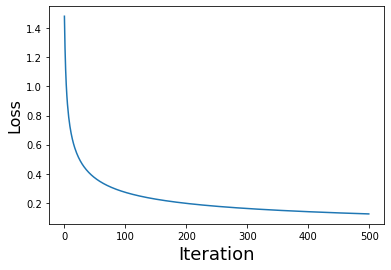

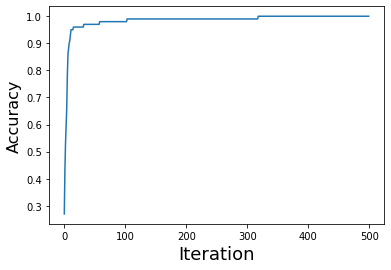

In [12]:
## Load Q3 Dataset
datapath = './Q3_data.npz'
data = np.load(datapath)

## Load Data and Parse Shape Information
X = data['X']
Y = data['Y']
print(X.shape, Y.shape, np.unique(Y))
nin = X.shape[1]
nout = np.max(Y) + 1

## Initialize data using your Value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

## Initialize a Linear Model
linear_model = LinearLayer(nin, nout)

## Train the Model using Your Data
train(x, y, linear_model)

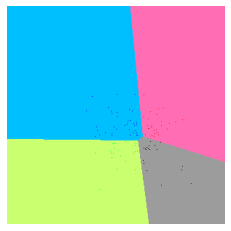

In [13]:
## Visualize learned decision boundaries
visualization(X, Y, linear_model)

## Question 4

### a) Is this dataset linear separable?
load the dataset for this question and train a linear model on this dataset and report the performance

In [14]:
## Load Q4 Dataset
datapath = './Q4_data.npz'
data = np.load(datapath)

## Parse Data and Identify Dimensions
X = data['X']
Y = data['Y']
nin = X.shape[1]
nout = int(np.max(Y)) + 1

## Initialize data using your value class
x = [[Value(v) for v in sample] for sample in X]
y = [int(v) for v in Y]

iteration 19 loss: 0.3747348484861411 accuracy: 0.825
iteration 39 loss: 0.3566417279503506 accuracy: 0.825
iteration 59 loss: 0.34951194194289237 accuracy: 0.825
iteration 79 loss: 0.34547118457422227 accuracy: 0.825
iteration 99 loss: 0.34283309175701987 accuracy: 0.825
iteration 119 loss: 0.34097854116802295 accuracy: 0.825
iteration 139 loss: 0.3396140740671241 accuracy: 0.825
iteration 159 loss: 0.3385790042545642 accuracy: 0.825
iteration 179 loss: 0.3377765174375198 accuracy: 0.85
iteration 199 loss: 0.3371441166547128 accuracy: 0.85
iteration 219 loss: 0.336639341609726 accuracy: 0.85
iteration 239 loss: 0.33623222058894814 accuracy: 0.85
iteration 259 loss: 0.3359009768282076 accuracy: 0.85
iteration 279 loss: 0.335629431569661 accuracy: 0.85
iteration 299 loss: 0.335405351615801 accuracy: 0.85
iteration 319 loss: 0.3352193536741601 accuracy: 0.85
iteration 339 loss: 0.3350641535214209 accuracy: 0.85
iteration 359 loss: 0.33493403774117797 accuracy: 0.85
iteration 379 loss: 0.

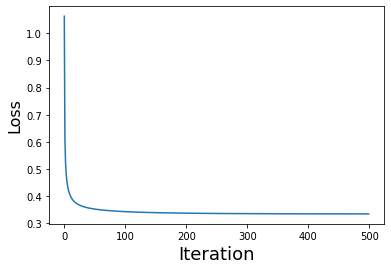

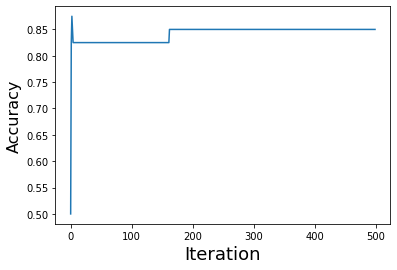

In [15]:
## Initialize Linear Model
linear_model = LinearLayer(nin, nout)

## Train Model
train(x, y, linear_model)

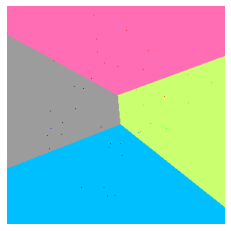

In [16]:
## Visualize Learned Decision Boundary
visualization(X, Y, linear_model)

### b) Implementation of Multi Layer Perceptron (MLP)

Implement a class `MLP` to add arbitrary layers. You will need to implement the forward function to return results `out` with `x` fed into the model.

In [17]:
class MLP(Module):
    
    """
    Multi Layer Perceptron
    """
    def __init__(self, dimensions):
        """
        Initialize multiple layers here in the list named self.linear_layers
        """
        assert isinstance(dimensions, list)
        assert len(dimensions) > 2
        self.linear_layers = []
        for i in range(len(dimensions) - 1):
            self.linear_layers.append(LinearLayer(dimensions[i], dimensions[i+1]))

    def __call__(self, x):
        """
        Args:
            x (2d-list): Two dimensional list of Values with shape [batch_size , nin]
        
        Returns:
            xout (2d-list): Two dimensional list of Values with shape [batch_size, nout]
        """
        #TODO Implement this function and return the output of a MLP
        
        #linear_layer -> relu -> linear_layer -> relu -> …linear_layer
        xout = [x]
        L = len(self.linear_layers)
        for layer in range(L):
            prev = self.linear_layers[layer](xout[-1])
            if layer == L - 1:
                return prev
        #for n linear layers we need n-1 relu (we do not apply relu to the output of the last linear layer)
            temp1 = []
            for i in range(len(prev)):
                temp2 = []
                for j in range(len(prev[0])):
                    relu = Value(data=0)
                    relu = prev[i][j].relu()      #Use ReLU as activation functions for the first hidden layer
                    temp2.append(relu)
                temp1.append(temp2)
            xout.append(temp1)
        
        return xout
  
    def parameters(self):
        """
        Get the parameters of each layer
        
        Args:
            None
        
        Returns:
            params (list of Values): Parameters of the MLP
        """
        return [p for layer in self.linear_layers for p in layer.parameters()]
  
    def zero_grad(self):
        """
        Zero out the gradient of each parameter
        """
        for p in self.parameters():
            p.grad = 0

Train your MLP model and visualize the decision boundary with ground truth points.

iteration 19 loss: 0.31878978377746875 accuracy: 0.85
iteration 39 loss: 0.28785275211432565 accuracy: 0.85
iteration 59 loss: 0.29092514197494296 accuracy: 0.85
iteration 79 loss: 0.2926768765193544 accuracy: 0.825
iteration 99 loss: 0.28191404550405696 accuracy: 0.85
iteration 119 loss: 0.2722271666870359 accuracy: 0.875
iteration 139 loss: 0.2658083668902908 accuracy: 0.875
iteration 159 loss: 0.25708735896248514 accuracy: 0.9
iteration 179 loss: 0.25133000224376667 accuracy: 0.9
iteration 199 loss: 0.24512056853621667 accuracy: 0.9
iteration 219 loss: 0.2376492026744943 accuracy: 0.9
iteration 239 loss: 0.22918728397882832 accuracy: 0.9
iteration 259 loss: 0.22026128965540345 accuracy: 0.9
iteration 279 loss: 0.20425646925486893 accuracy: 0.925
iteration 299 loss: 0.41001554128607653 accuracy: 0.875
iteration 319 loss: 0.20144273717342176 accuracy: 0.9
iteration 339 loss: 0.1831942971652174 accuracy: 0.925
iteration 359 loss: 0.19316813624146434 accuracy: 0.925
iteration 379 loss: 

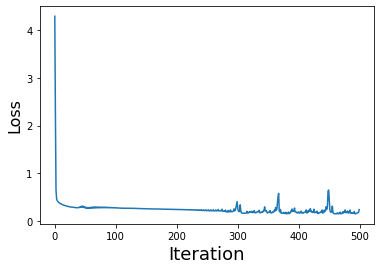

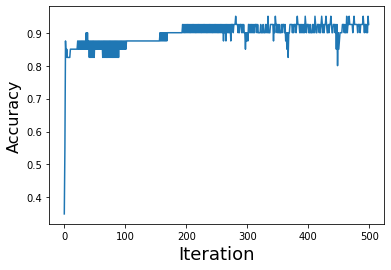

In [20]:
## Initialize MLP with Given Parameters
mlp_model = MLP([nin, 40, nout])

## Train the MLP
train(x, y, mlp_model)

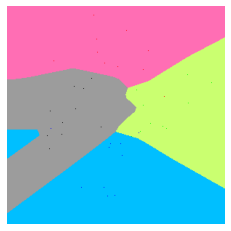

In [21]:
## Visualize Decision Boundaries
visualization(X, Y, mlp_model)

## Acknowledgement

The design of the auto grade structure are based on the work https://github.com/karpathy/micrograd